# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

## Problem

Giving the data provided below (x->y), find the best equation fit, using:

* Gradient Descent
* Normal Equations

Using your own python implementation, using numpy and scipy tools (**not scipy!**).

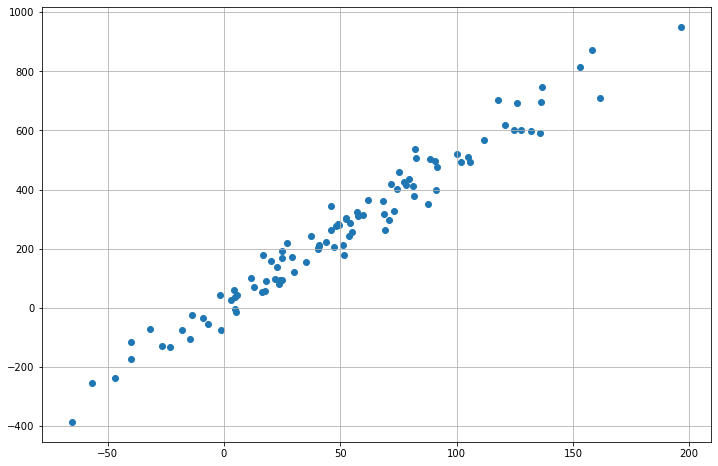

In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5


X = (np.random.randn(100) + 1) * 50
#X=np.linspace(-50,150,100)
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(X,5*X,'g-')
ax.scatter(X, y)
ax.grid(True)

In [2]:
theta = np.array([1.0,4.97]) #theta=[theta_0,theta_1]

In [3]:
theta

array([1.  , 4.97])

In [4]:
y = theta_0 + theta_1 * X

In [5]:
Xp = [col(1);X]

SyntaxError: invalid syntax (4264955884.py, line 1)

In [6]:
xp_i = [1,x_i]

NameError: name 'x_i' is not defined

In [7]:
#INDICIAL
y_i_hat = theta_0 + theta_1*x_i = xp_i*[theta_0,theta_1]T

SyntaxError: invalid syntax (1833701322.py, line 2)

In [8]:
#VECTORIAL
y_hat = Xp*theta

NameError: name 'Xp' is not defined

In [9]:
def f_evaluacion(x):
    h_theta = theta_0 + theta_1 * x
    return h_theta

def f_coste_theta_0(x,y):
    coste_theta_0 = (2 / theta_0) * ((sum(f_evaluacion(x)) - y) ** 2)
    return coste_theta_0

def f_coste_theta_1(x,y):
    coste_theta_1 = (2 / theta_0) * ((sum(f_evaluacion(x)) - y) ** 2) * (f_evaluacion(x))
    return coste_theta_1

In [10]:
#DESDE CERO

In [11]:
#punto de partida X e y (que son cada uno un array)

In [12]:
#lo primero es obtener la funcion de coste, para ello:
#hipotesis: h_theta = theta_0 + theta_1 * x
theta_0 = -1
theta_1 = 1
h = X*theta_1 + theta_0


In [13]:
#Ahora le restamos a la h la y obteniendo el error:
error = h - y

In [14]:
# ahora lo elevamos al cuadrado para que no se nos anulen los errores
error2 = error ** 2

In [15]:
#ahora calculamos la suma, q es el coste:
cost = error2.sum()/len(X)

In [16]:
def cost_function(X,y):
    #return_function = error2.sum()/len(X)
    #return_function = (error**2).sum()/len(X)
    #return_function = ((h-y)**2).sum()/len(X)
    #return_function = (((X*theta_1 + theta_0)-y)**2).sum()/len(X)
    return_function = lambda theta_0,theta_1: (((X*theta_1 + theta_0)-y)**2).sum()/len(X)
    return return_function

In [17]:
l_theta_0 = [-1,10,1000]
l_theta_1 = [-2,5,10]


#for theta_0 in l_theta_0:
#    for theta_1 in theta_1:
#            J = cost_function(X,y)
#    print(J(theta_0, theta_1))
        
# o tambn:
for theta_0,theta_1 in zip(l_theta_0,l_theta_1):
    J = cost_function(X,y)
    print(J(theta_0, theta_1))

260357.1916069281
64.0
1637178.2200716052


In [34]:
def grad_theta_0(X,y):
    return_function_0 = lambda theta_0,theta_1: 2*((X*theta_1 + theta_0-y).sum())/len(X)
    return return_function_0

def grad_theta_1(X,y):
    return_function_1 = lambda theta_0,theta_1: 2*(((X*theta_1 + theta_0-y)*X).sum())/len(X)
    return return_function_1

In [35]:
theta0 = 1
theta1 = -1
Dtheta0 = grad_theta_0(X,y)
print(Dtheta0(theta0,theta1))
Dtheta1 = grad_theta_0(X,y)
print(Dtheta1(theta0,theta1))

-614.5499188885082
-614.5499188885082


In [41]:
n = 100
theta_0 = 1
theta_1 = -1
alpha = 0.0001

for i in range(0,n):
    theta_0_next = theta_0 - (alpha * Dtheta0(theta_0,theta_1))
    theta_1_next = theta_1 - (alpha * Dtheta1(theta_0,theta_1))
    theta_0, theta_1 = theta_0_next, theta_1_next
print(theta_0_next,theta_1_next)



4.830413378677865 2.8304133786778687


In [49]:
def get_yhat(X,N=2):
    X_ref = np.linspace(0.99*X.min(),1.01*X.max(),N)
    return [X_ref, lambda theta_0,theta_1: theta_1 * X_ref + theta_0]

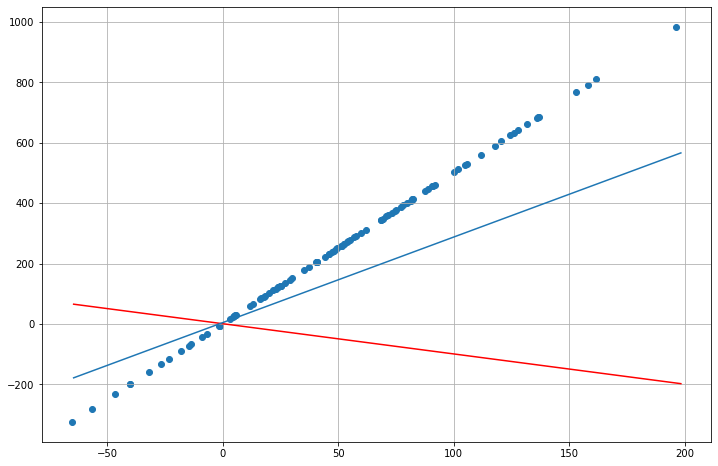

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
x_ref, yhat_ref = get_yhat(X)
ax.scatter(X, y)
ax.grid(True)
plt.plot(x_ref,yhat_ref(1,-1),'r')
plt.plot(x_ref,yhat_ref(theta_0,theta_1))

In [68]:
n = 100000
theta_0 = 1
theta_1 = -1
alpha = 0.0001
cost = J(theta_0, theta_1)
epsilon = 0.01
print(cost)

def cost_function(X,y):
    return lambda theta_0,theta_1: (((X*theta_1 + theta_0)-y)**2).sum()/len(X)
cost = J(theta_0,theta_1)

def grad_theta_0(X,y):
    return lambda theta_0,theta_1: 2*((X*theta_1 + theta_0-y).sum())/len(X)
def grad_theta_1(X,y):
    return lambda theta_0,theta_1: 2*(((X*theta_1 + theta_0-y)*X).sum())/len(X)
Dtheta0 = grad_theta_0(X,y)
Dtheta1 = grad_theta_0(X,y)


for i in range(0,n):
    theta_0_next = theta_0 - (alpha * Dtheta0(theta_0,theta_1))
    theta_1_next = theta_1 - (alpha * Dtheta1(theta_0,theta_1))
    theta_0, theta_1 = theta_0_next, theta_1_next
    new_cost = J(theta_0,theta_1)#esto al final no dice si hemos mejorado o no, recordemos q el coste era el error
    DeltaCost = new_cost - cost#el incremento del coste
    cost = new_cost#volvemos a cambiar por el nuevo cost
    
    if np.abs(DeltaCost) < epsilon:
        print(i)
        break
print(theta_0,theta_1)
print(cost)

190314.64396112235
774
6.90215547946448 4.902155479464483
25.510545495968863


In [66]:
#esto tambn lo podemos hacer con optimize
from scipy.optimize import fmin
fmin(J,[0,0])

TypeError: <lambda>() missing 1 required positional argument: 'theta_1'

In [ ]:
#AHORA VAMOS CON LA SEGUNDA PARTE CON MATRICES

In [69]:
def create_poly(k,x):
    n_example = len(x)
    phi = np.ones((n_example,k + 1))
    for j in range(k+1):
        poli = x**j
        phi[:,j]=poli.ravel()#el ravel es para asegurarse que la dimension esta bien, es para que no falle, el cambio de fila por columna
    return phi

In [71]:
X1 = create_poly(1,X)
A = np.dot(X1.T,X1)
B = np.dot(X1.T,y)
X1

array([[  1.        ,  45.83860956],
       [  1.        ,  82.44857885],
       [  1.        , 102.04043581],
       [  1.        ,  88.67571483],
       [  1.        ,  78.04739038],
       [  1.        ,  29.0511374 ],
       [  1.        ,  69.14848157],
       [  1.        ,  68.36161836],
       [  1.        ,  75.13112273],
       [  1.        ,  40.38040268],
       [  1.        ,  91.76349336],
       [  1.        ,  21.82368604],
       [  1.        ,  87.53114539],
       [  1.        , -46.89630979],
       [  1.        ,  70.82904404],
       [  1.        , -31.91342663],
       [  1.        , 135.84691767],
       [  1.        ,  90.69193335],
       [  1.        ,  17.70558047],
       [  1.        , -18.01034121],
       [  1.        , 111.67003589],
       [  1.        , -14.77104877],
       [  1.        ,  68.69599632],
       [  1.        , -26.71257867],
       [  1.        , 131.81138577],
       [  1.        ,  81.29406834],
       [  1.        ,  56.98189602],
 

In [72]:
normal = np.linalg.solve(A,B)

In [73]:
normal

array([2., 5.])

In [ ]:
#AHORA PARABOLA, EN VEZ DE LINEAL ES DECIR DE ORDEN 1 A ORDEN 2

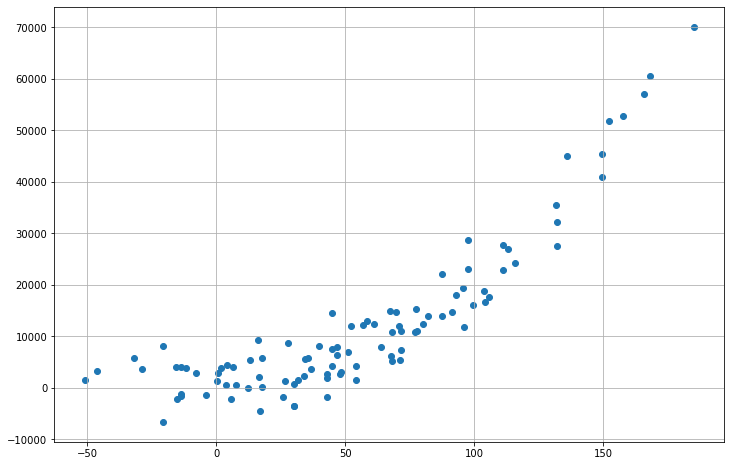

In [74]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5
theta_2 = 2


X = (np.random.randn(100) + 1) * 50
#X=np.linspace(-50,150,100)
jitter = 4000 * np.random.randn(100)
y = theta_0 + theta_1 * X + theta_2 * X**2 + jitter

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(X,5*X,'g-')
ax.scatter(X, y)
ax.grid(True)

In [81]:
#meter todo esto en una funcion y luego meterlo en un modulo

In [95]:
def gradient_descent(X,y,n=100000,theta_0=1,theta_1=1,alpha=0.0001,epsilon=0.001):
    def get_yhat(X,N=2):
        X_ref = np.linspace(0.99*X.min(),1.01*X.max(),N)
        return [X_ref, lambda theta_0,theta_1: theta_1 * X_ref + theta_0]

    def cost_function(X,y):
        return lambda theta_0,theta_1: (((X*theta_1 + theta_0)-y)**2).sum()/len(X)
    J = cost_function(X,y)
    cost = J(theta_0,theta_1)

    def grad_theta_0(X,y):
        return lambda theta_0,theta_1: 2*((X*theta_1 + theta_0-y).sum())/len(X)
    Dtheta0 = grad_theta_0(X,y)
    def grad_theta_1(X,y):
        return lambda theta_0,theta_1: 2*(((X*theta_1 + theta_0-y)*X).sum())/len(X)
    Dtheta1 = grad_theta_0(X,y)


    for i in range(0,n):
        theta_0_next = theta_0 - (alpha * Dtheta0(theta_0,theta_1))
        theta_1_next = theta_1 - (alpha * Dtheta1(theta_0,theta_1))
        theta_0, theta_1 = theta_0_next, theta_1_next
        new_cost = J(theta_0,theta_1)
        DeltaCost = new_cost - cost
        cost = new_cost
    
        if np.abs(DeltaCost) < epsilon:
            print(i)
            break
            
    return theta_0,theta_1

In [96]:
gradient_descent(X,y)

1783


(217.6708776684831, 217.6708776684831)

1783


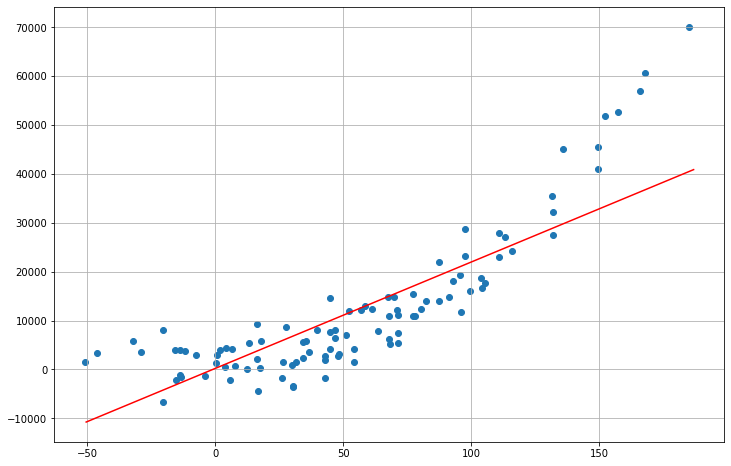

In [98]:
x_ref, yhat = get_yhat(X)
theta_0_grad, theta_1_grad = gradient_descent(X,y)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_ref,yhat(theta_0_grad,theta_1_grad), 'r')
ax.scatter(X, y)
ax.grid(True)